In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
file = 'regional_fuel_prices.xlsx'
df = pd.read_excel(file, sheet_name="Graphs adj prices")
df.drop(columns=['Modification'], inplace=True)
df

,Location,Product Name,Case,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,West North Central - NE,Distillate Fuel Oil,Reference case,1.941533,1.858428,1.729584,1.786610,1.749422,1.714096,1.688479,...,1.874224,1.874748,1.903331,1.933862,1.943933,1.963224,1.968626,1.963096,1.958807,1.949004
1,West North Central - NE,Distillate Fuel Oil,High oil and gas supply,1.941533,1.859045,1.681571,1.685799,1.640233,1.605405,1.585068,...,1.630685,1.629768,1.657521,1.667269,1.671561,1.695431,1.681416,1.686931,1.709660,1.723105
2,West North Central - NE,Distillate Fuel Oil,Low oil and gas supply,1.941534,1.859014,1.715166,1.808116,1.811017,1.798828,1.789777,...,2.124696,2.133146,2.164799,2.187232,2.226074,2.235698,2.240943,2.220442,2.220189,2.231894
3,West South Central,Distillate Fuel Oil,Reference case,2.050833,1.961526,1.844828,1.913568,1.887476,1.863470,1.848661,...,2.044250,2.045461,2.074201,2.105402,2.115700,2.134780,2.140855,2.136122,2.131948,2.122420
4,West South Central,Distillate Fuel Oil,High oil and gas supply,2.050834,1.961276,1.795868,1.811836,1.777271,1.754306,1.745087,...,1.801044,1.800255,1.827644,1.837210,1.840357,1.864891,1.850516,1.855966,1.879118,1.892657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,East North Central - IL,Naphtha,High oil and gas supply,0.921900,0.862255,0.681632,0.639960,0.620341,0.625176,0.638213,...,0.721362,0.724531,0.734062,0.741240,0.743319,0.752060,0.743692,0.749308,0.764380,0.777511
80,East North Central - IL,Naphtha,Low oil and gas supply,0.921900,0.862255,0.696333,0.741048,0.750517,0.766206,0.787619,...,1.003904,1.022403,1.037788,1.046961,1.069274,1.062973,1.061675,1.050174,1.062098,1.071058
81,East North Central - OH,Naphtha,Reference case,1.249043,1.189398,1.027825,1.016187,1.000568,1.011966,1.025954,...,1.197989,1.199729,1.213444,1.227671,1.231798,1.244297,1.249204,1.245342,1.246487,1.245425
82,East North Central - OH,Naphtha,High oil and gas supply,1.249043,1.189398,1.008774,0.967102,0.947484,0.952319,0.965356,...,1.048505,1.051674,1.061205,1.068383,1.070462,1.079203,1.070835,1.076451,1.091523,1.104654


In [3]:
# Clean up data
LOCATIONS = df['Location'].unique()
FUELS = df['Product Name'].unique()
CASES = df['Case'].unique()
YEARS = [i for i in range(2021,2051)]
new_df = pd.DataFrame(columns=['Location','Product','Case','Year','Value'])
l = [LOCATIONS, FUELS, CASES, YEARS]
combination = [p for p in itertools.product(*l)]
tests = combination[:2]
for p in combination:
  values = df[(df['Location']==p[0]) &(df['Product Name']==p[1]) & (df['Case']==p[2])]
  value = float(values[p[3]])
  d = {'Location':[p[0]],
        'Product':[p[1]],
        'Case':[p[2]],
        'Year':[p[3]],
        'Value':[value]}
  d = pd.DataFrame.from_dict(d)
  new_df = pd.merge(new_df, d, how='outer')
new_df.to_csv('regional_fuel_prices.csv', index=False)
new_df.head()


,Location,Product,Case,Year,Value
0,West North Central - NE,Distillate Fuel Oil,Reference case,2021,1.941533
1,West North Central - NE,Distillate Fuel Oil,Reference case,2022,1.858428
2,West North Central - NE,Distillate Fuel Oil,Reference case,2023,1.729584
3,West North Central - NE,Distillate Fuel Oil,Reference case,2024,1.786610
4,West North Central - NE,Distillate Fuel Oil,Reference case,2025,1.749422


In [4]:
print(LOCATIONS)
print(len(LOCATIONS))

['West North Central - NE' 'West South Central' 'Mountain' 'Pacific'
 'West North Central - MN' 'East North Central - IL'
 'East North Central - OH']
7


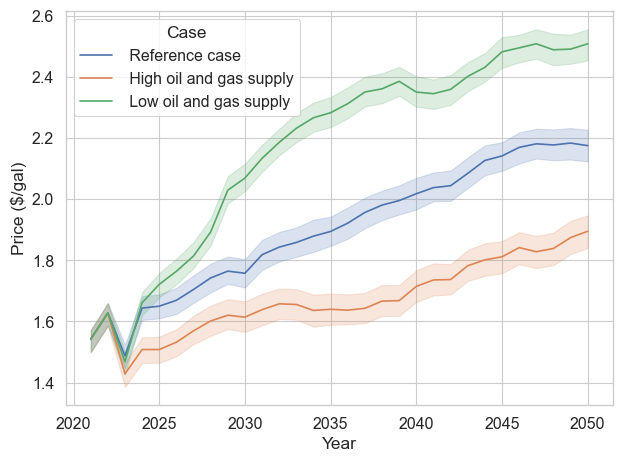

In [6]:
sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.3)

CASES = {'Reference case':'-',
          'Low oil and gas supply': '..',
          'High oil and gas supply':'-*'}


jet_fuel_df = new_df[new_df['Product']==' Jet Fuel']
li = []
for l in LOCATIONS:
  temp_df = jet_fuel_df[jet_fuel_df['Location']==l]
  li.append(temp_df)
fig, ax = plt.subplots()
sns.lineplot(data=jet_fuel_df, ax=ax, x='Year', y='Value', hue='Case')
ax.set_ylabel('Price ($/gal)')
fig.tight_layout()
fig.savefig('synfuel_prices.png')